In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

#Introduction

Ce notebook vise à présenter l'évolution d'un TVAR(2) en fonction du choix de T qui définit l'intervalle entre deux mesures du processus sur l'intervalle [0,1].

Rappelons que nous définissons le TVAR(2) comme suit $\forall t$ dans $[0,1]$:

\begin{equation}
X_{t,T} = a_1(\frac{t}{T})X_{t-1,T} + a_2(\frac{t}{T})X_{t-2,T} + \sigma(\frac{t}{T})\epsilon_{t,T}
\end{equation}

Avec $\epsilon_{t,T}$ un bruit blanc centré de variance 1.
Dans la suite, pour simplifier les expressions, on prendra $\sigma(u)=1$ sur $[0,1]$.

#Premier exemple

Prenons le polynôme caractéristique avec $\forall u$ dans $[0,1]$:
    \begin{equation}
    A(z;u) = 1 - a_1(u) z - a_2(u) z^2
    \end{equation}
    
Avec $\forall u$ dans $[0,1]$:
    \begin{equation}
    a_1(u) = u
    \end{equation}
    \begin{equation}
    a_2(u) = 1 - u
    \end{equation}

In [2]:
epsilon = np.random.randn(int(2e4))

### T = 100

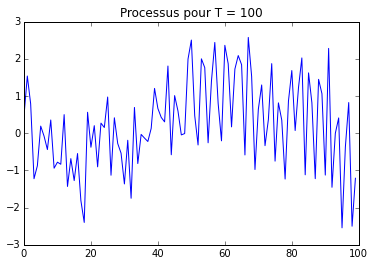

In [3]:
T = 100
X = np.zeros(2*T)
a_1 = np.zeros(2*T)
a_2 = np.zeros(2*T)

a_1[T:2*T] = np.arange(T, dtype = 'double') / T
a_2[T:2*T] = a_1[T:2*T][::-1]
    
X[0] = epsilon[0]
X[1] = epsilon[100]
    
for n in np.arange(2*T-2):
    X[n+2] = a_1[n+2]*X[n-1] + a_2[n+2]*X[n-2] + epsilon[(n+2)*100]
    
t = np.arange(2*T) - T #horizon des temps

plt.plot(t[T:2*T], X[T:2*T])
plt.title("Processus pour T = 100")

### T = 1000

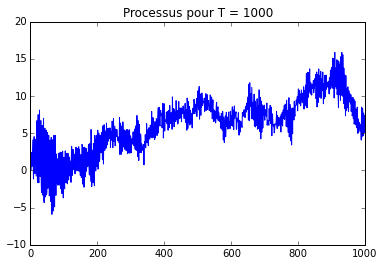

In [4]:
T = 1000
X = np.zeros(2*T)
a_1 = np.zeros(2*T)
a_2 = np.zeros(2*T)


a_1[T:2*T] = np.arange(T, dtype = 'double') / T
a_2[T:2*T] = a_1[T:2*T][::-1]
    
X[0] = epsilon[0]
X[1] = epsilon[10]
    
for n in np.arange(2*T-2):
    X[n+2] = a_1[n+2]*X[n-1] + a_2[n+2]*X[n-2] + epsilon[(n+2)*10]
    
t = np.arange(2*T) - T #horizon des temps

plt.plot(t[T:2*T], X[T:2*T])
plt.title("Processus pour T = 1000")

###T = 10000

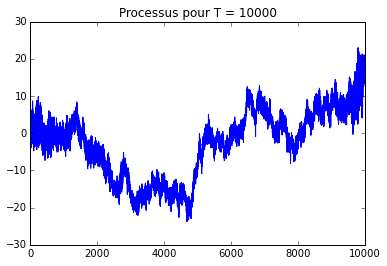

In [5]:
T = 10000
X = np.zeros(2*T)
a_1 = np.zeros(2*T)
a_2 = np.zeros(2*T)

a_1[T:2*T] = np.arange(T, dtype = 'double') / T
a_2[T:2*T] = a_1[T:2*T][::-1]
    
X[0] = epsilon[0]
X[1] = epsilon[1]
    
for n in np.arange(2*T-2):
    X[n+2] = a_1[n+2]*X[n-1] + a_2[n+2]*X[n-2] + epsilon[n+2]
    
t = np.arange(2*T) - T #horizon des temps

plt.plot(t[T:2*T], X[T:2*T])
plt.title("Processus pour T = 10000")

Trovuer les coefficients qui vont bien :
- relations coefficients racine
- algo de levinson pour trouver les coefficients AR à partir des coefficients de corrélation (relations par récurrence, avec des coeff causaux, continus... ; trouver $\kappa=f(\Phi)$)

Dans le cas de levinson, prendre une matrice de correaltion et pas d'autocovariance pour assurer la stabilité.

Trouver une implémentation de $\hat\theta$ et de sa DSP en fonction de $\lambda$ et de $t$.

Faire une simulation avec des coeff complexes conjugués avec animation de la DSP. La puissance se trouve là où $\lambda$ = angle($\phi$).

Trouver ensuite sur les exemples le comportement de $\mu$ (terme de variance dans le théorème 2) et comprendre son influence.